# Supplementary notebook
 
This notebook contains the estimation of the dilution parameter d and the plot showing the effect of dilution on a pooled test's sensitivity as a function of the concentration of viral load.

In [1]:
import os
os.chdir("../")

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import json
from src import utils
from src.utils import get_fig_dim
from IPython.display import clear_output
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 6)

## Estimation of dilution parameter

In [3]:
se=0.99 # Analytic sensitivity
sp=0.99 # Analytic specificity
S_val = [0.81, 0.91, 0.93, 0.99]
c_val = [0.02, 0.1, 0.2, 1.0]
xs = np.array([np.log(c) for c in c_val])
ys = np.array([np.log((S-1+sp)/(sp+se-1)) for S in S_val])
xs = xs.reshape(-1,1)
reg = Ridge(alpha=1.0).fit(xs, ys)
d = reg.coef_[0]
print('Estimated dilution parameter: {d}'.format(d=d))

Estimated dilution parameter: 0.04549745359504318


## Visualization of dilution

In [5]:
c = np.linspace(0, 1.0, 100000)
S = 1 - sp + (sp+se-1)*np.power(c, d)

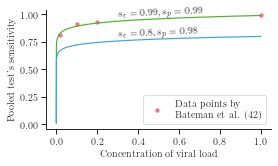

In [6]:
utils.latexify(font_size=10)

fig_height, fig_aspect = get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_height*fig_aspect,fig_height))

sns.scatterplot(x=c_val, y=S_val, ax=ax, color=palette[0], label='Data points by\nBateman et al. (42)')
ax.legend()

se, sp=0.99, 0.99
S = 1 - sp + (sp+se-1)*np.power(c, d) 
sns.lineplot(x=c, y=S, ax=ax, color=palette[2], legend=None)
ax.text(0.3,0.98,r'$s_e={se}, s_p={sp}$'.format(se=se, sp=sp),rotation=2.5)

se, sp=0.8, 0.98
S = 1 - sp + (sp+se-1)*np.power(c, d) 
sns.lineplot(x=c, y=S, ax=ax, color=palette[4], legend=None)
ax.text(0.3,0.8,r'$s_e={se}, s_p={sp}$'.format(se=se, sp=sp),rotation=2.5)

sns.despine()

ax.set_ylabel('Pooled test\'s sensitivity')
ax.set_xlabel('Concentration of viral load')
ax.legend()
fig.tight_layout()
fig.savefig('figures/sci-adv-figs1.pdf')